# Component ID data - *Data Exploration*

## Input

#### Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use = "default"

#### Data

In [28]:
# Read data
files = ["../Data_Acetate/acetateIdTags.csv","../Data_Acetate/acetateIdTagsTr.csv"]
dfs = [pd.read_csv(f,encoding="utf-8-sig") for f in files]
dfs[0]['System'] = "Acetate"
dfs[1]['System'] = "Tracing"
df = pd.concat(dfs)

#print("#ID's = {}".format(df['Id'].count()))
#df.head(5)

In [29]:
# Transform data
df['Min'] = np.where(df['Min'].isnull(), None, df['Min'])
df['Max'] = np.where(df['Max'].isnull(), None, df['Max'])

#print("#ID's = {}".format(df['Id'].count()))
#df.head(5)

In [30]:
# Filter data
del df['Min']
del df['Max']
df['Tag'] = df['Id'].map(lambda x: x.split('-')[-1])
df['Id'] = df['Id'].map(lambda x: '-'.join(x.split('-')[:-1]))
df['Cnt']= df['Id'].map(lambda x: df[df['Id']==x]['Id'].count())
df['Tag'] = np.where(df['Cnt']==2, 'Both', df['Tag'])
del df['Cnt']
df.drop_duplicates(inplace=True)

print("#ID's = {}".format(df['Id'].count()))
df.head(5)

#ID's = 540


Group                      Id   System   Tag
0  HMI Diagnose  CF-HMI-ST623-003-PLC07  Acetate  VISU
1  HMI Diagnose      CF-HMI-ST623-PLC07  Acetate  VISU
2  HMI Diagnose     CF-HMI-ST625A-PLC07  Acetate  VISU
3          LP1B          FCV-250-04-041  Acetate  Both
5          LP1A          FCV-250-05-041  Acetate  Both

## Exploration

In [84]:
df_ac = df[df['System']=='Acetate']
df_tr = df[df['System']=='Tracing']

In [31]:
d = df.describe()
d.loc['count':'unique']

Group   Id System  Tag
count    540  540    540  540
unique    41  540      2    3

#### ID's 

In [70]:
# ID's per tags per system
pd.crosstab(index=df['Tag'],columns=df['System'],margins=True)

System  Acetate  Tracing  All
Tag                          
Both        140       60  200
EU           17        0   17
VISU        248       75  323
All         405      135  540

In [79]:
# ID's per group per system
ct = pd.crosstab(index=df['Group'],columns=df['System'],margins=True)
ct.sort_values(by=['Acetate','All'],ascending=False)

System                 Acetate  Tracing  All
Group                                       
All                        405      135  540
PS20                        49        0   49
Warm water unit             48        0   48
Steiger                     27        0   27
LP1A                        21        0   21
LP1B                        21        0   21
LA116                       20        0   20
LA117                       19        0   19
LA118                       19        0   19
LA119                       19        0   19
T250-4                      19        0   19
T250-5                      19        0   19
T300-6                      19        0   19
T300-7                      19        0   19
T420-1                      17        0   17
T420-2                      17        0   17
T420-3                      17        0   17
?                           12        0   12
HMI Diagnose                 3        0    3
LP1A/1B                      3        0    3
T420-01                      3        0    3
T420-02                      3        0    3
T420-03                      3        0    3
Afsluiter is hernoemd        2        0    2
LA116/117/118/119            2        0    2
T250-4/300-6                 2        0    2
T250-5/300-7                 2        0    2
XS-TR31-LPM-01               0        9    9
XS-TR31-PS15-01              0        9    9
XS-TR32-LPM-01               0        9    9
XS-TR32-ST625-01             0        9    9
XS-TR33-LPM-01               0        9    9
XS-TR33-TP20-01              0        9    9
XS-TR34-TP20-01              0        9    9
XS-TR35-TP20-01              0        9    9
XS-TR36-TP20-01              0        9    9
XS-TR37-TP20-01              0        9    9
XS-TR38-TP20-01              0        9    9
XS-TR39-TP20-01              0        9    9
XS-TR40-TP20-01              0        9    9
XS-TR41-TP20-01              0        9    9
XS-TR44-TP20-01              0        9    9

#### Groups, Tags, Systems

In [104]:
def PiePlot(df1,key):   
    plt.figure(figsize=(7.5,7.5))
    ax1 = plt.subplot(1,1,1)
    df1_grp = df1.groupby(key).size()
    df1_grp.sort_values(inplace=True,ascending=False)
    df1_grp.plot.pie(ax=ax1, title="#ID's per {}".format(key))
    plt.ylabel('')
    plt.show()
    return

def PiePlots(df1,df2,key):   
    plt.figure(figsize=(15,7.5))
    ax1 = plt.subplot(1,2,1)
    df1_grp = df1.groupby(key).size()
    df1_grp.sort_values(inplace=True,ascending=False)
    df1_grp.plot.pie(ax=ax1, title="Acetate system - #ID's per {}".format(key))
    plt.ylabel('')
    ax2 = plt.subplot(1,2,2)
    df2_grp = df2.groupby(key).size()
    df2_grp.sort_values(inplace=True,ascending=False)
    df2_grp.plot.pie(ax=ax2, title="Tracing system - #ID's per {}".format(key))
    plt.ylabel('')    
    plt.show()
    return

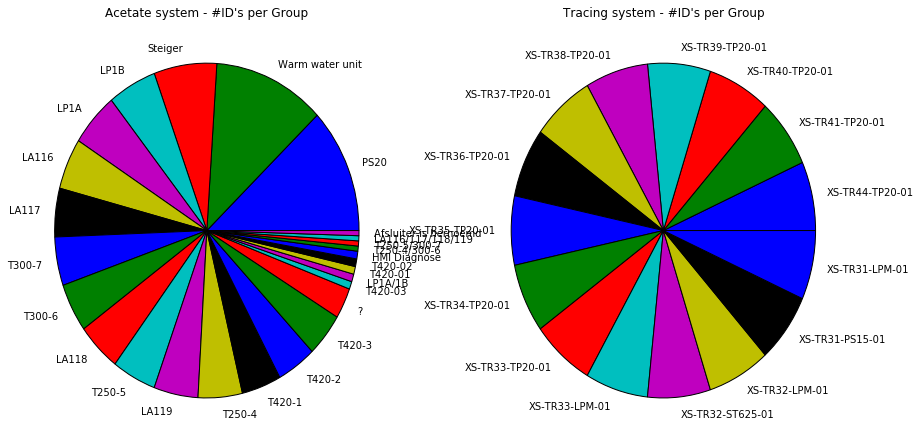

In [105]:
PiePlots(df_ac,df_tr,'Group')

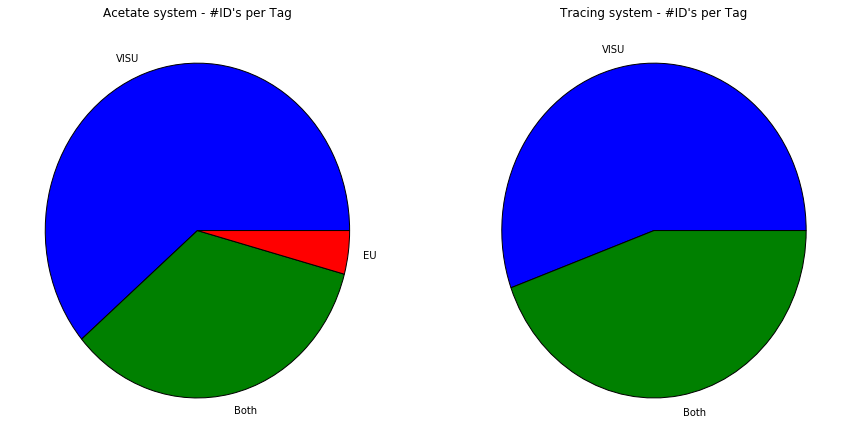

In [106]:
PiePlots(df_ac,df_tr,'Tag')

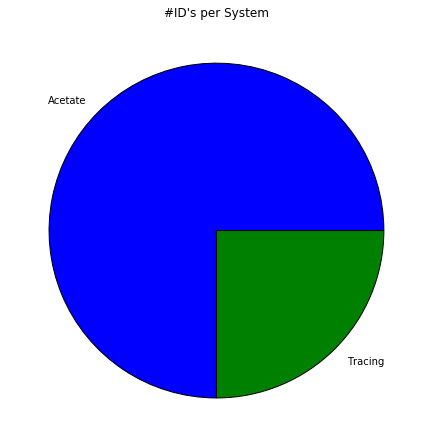

In [107]:
PiePlot(df,'System')